In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

DATA_PATH = "../data/raw/city.csv"

In [2]:
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
df.head()

Shape: (18265, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        18265 non-null  str    
 1   Date        18265 non-null  str    
 2   PM2.5       18265 non-null  float64
 3   PM10        18265 non-null  float64
 4   NO          18265 non-null  float64
 5   NO2         18265 non-null  float64
 6   NOx         18265 non-null  float64
 7   NH3         18265 non-null  float64
 8   CO          18265 non-null  float64
 9   SO2         18265 non-null  float64
 10  O3          18265 non-null  float64
 11  Benzene     18265 non-null  float64
 12  Toluene     18265 non-null  float64
 13  Xylene      18265 non-null  float64
 14  AQI         18265 non-null  float64
 15  AQI_Bucket  18265 non-null  str    
dtypes: float64(13), str(3)
memory usage: 2.2 MB


In [4]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000,18265.000000
mean,250.597695,299.442491,100.481035,75.415916,125.964079,25.065042,5.002451,49.835839,100.406740,10.070033,15.063365,4.996341,251.111382
std,144.460292,173.479906,57.774795,43.460066,72.403893,14.452019,2.889439,28.988739,57.591436,5.785282,8.619433,2.899152,144.502626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.700000,150.100000,50.600000,37.700000,63.100000,12.600000,2.490000,24.400000,50.600000,5.080000,7.640000,2.510000,125.400000
50%,251.000000,300.300000,100.200000,76.000000,126.200000,25.300000,5.000000,49.900000,100.700000,10.080000,15.130000,4.960000,251.200000
75%,376.200000,450.000000,151.000000,113.200000,188.900000,37.600000,7.510000,75.100000,150.400000,15.110000,22.500000,7.530000,376.400000
max,499.900000,600.000000,200.000000,150.000000,250.000000,50.000000,10.000000,100.000000,200.000000,20.000000,30.000000,10.000000,500.000000


In [5]:
missing = df.isnull().mean() * 100
missing = missing.sort_values(ascending=False)

missing

City          0.0
Date          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

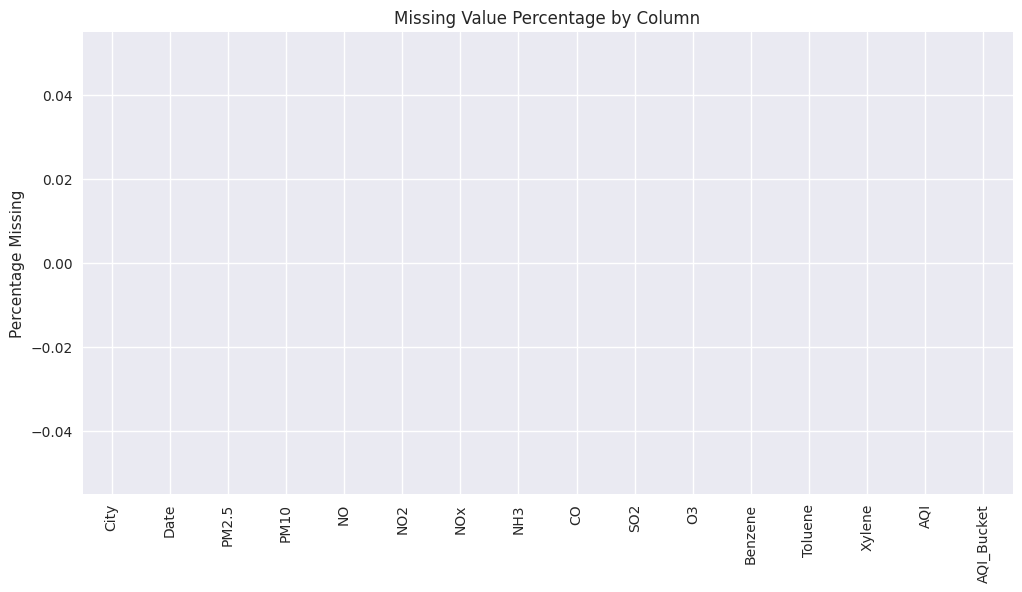

In [6]:
plt.figure(figsize=(12,6))
missing.plot(kind="bar")
plt.title("Missing Value Percentage by Column")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=90)
plt.show()

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

print("Date Range:")
print("Start:", df["Date"].min())
print("End:", df["Date"].max())

Date Range:
Start: 2015-01-01 00:00:00
End: 2024-12-31 00:00:00


In [8]:
print("Number of Cities:", df["City"].nunique())

df["City"].value_counts().head(10)

Number of Cities: 5


City
Delhi        3653
Mumbai       3653
Chennai      3653
Kolkata      3653
Bangalore    3653
Name: count, dtype: int64

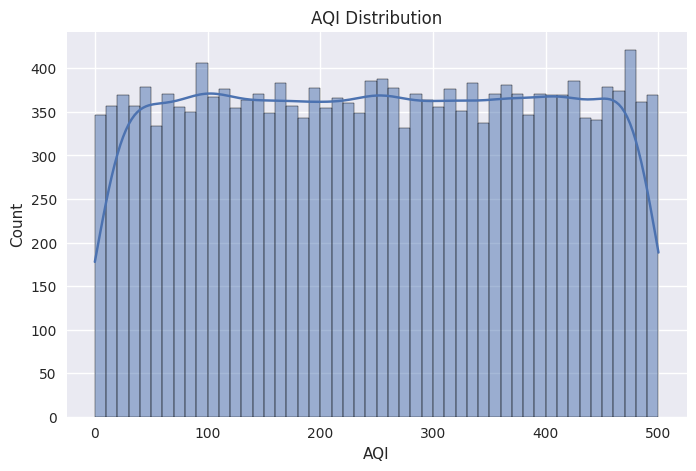

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["AQI"].dropna(), bins=50, kde=True)
plt.title("AQI Distribution")
plt.show()

In [10]:
df["AQI_Bucket"].value_counts()

AQI_Bucket
Severe          3121
Satisfactory    3098
Good            3094
Poor            3016
Very Poor       2989
Moderate        2947
Name: count, dtype: int64

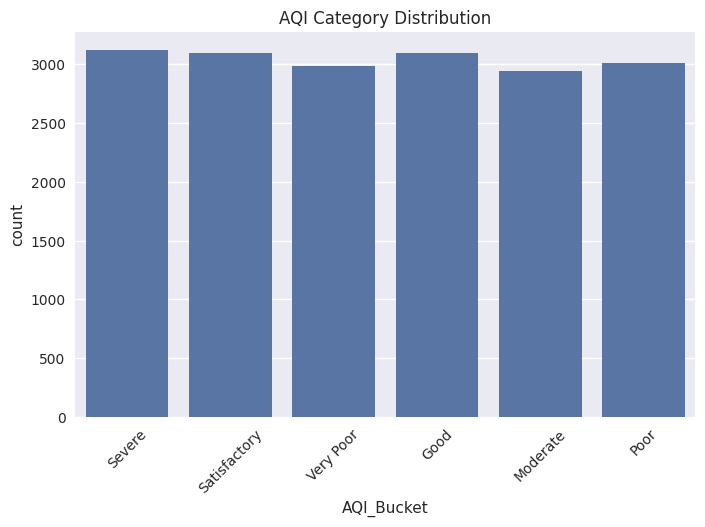

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x="AQI_Bucket", data=df)
plt.xticks(rotation=45)
plt.title("AQI Category Distribution")
plt.show()

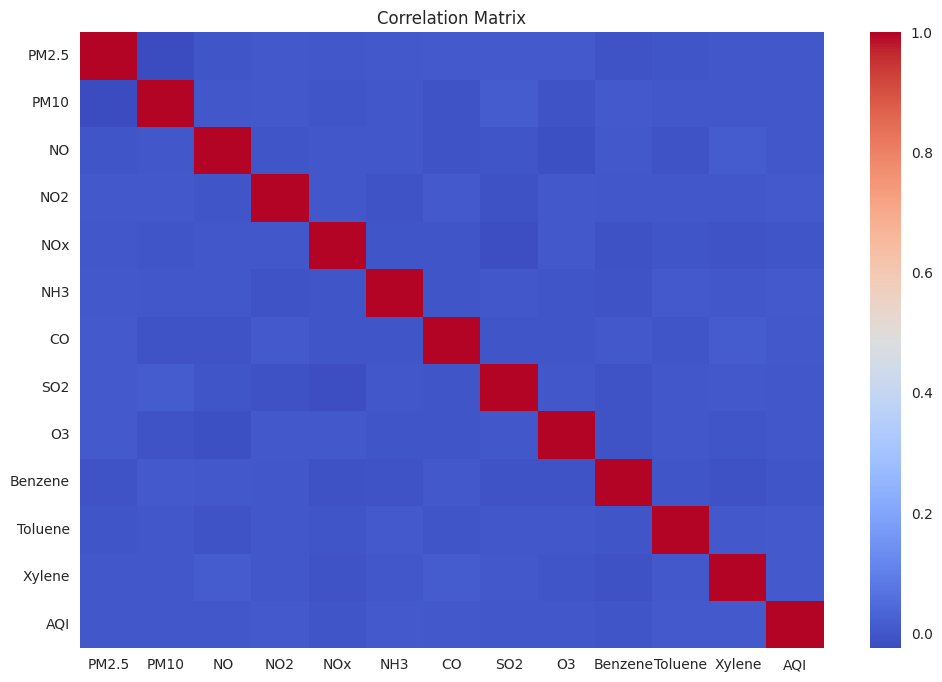

In [12]:
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

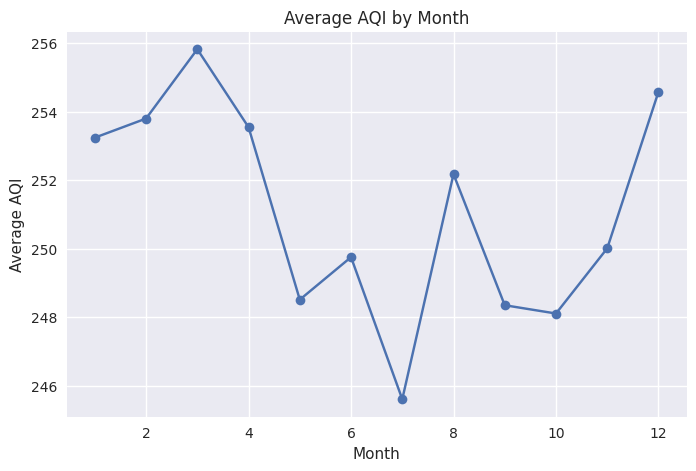

In [13]:
df["Month"] = df["Date"].dt.month

monthly_avg = df.groupby("Month")["AQI"].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(marker="o")
plt.title("Average AQI by Month")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.show()

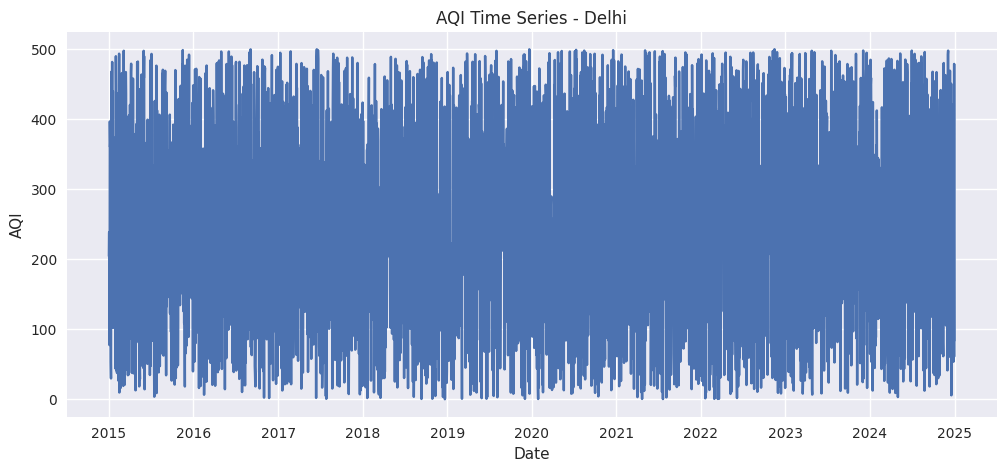

In [14]:
city_example = "Delhi"

city_df = df[df["City"] == city_example].sort_values("Date")

plt.figure(figsize=(12,5))
plt.plot(city_df["Date"], city_df["AQI"])
plt.title(f"AQI Time Series - {city_example}")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()

In [15]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
Month         0
dtype: int64

In [16]:
numeric_df = df.select_dtypes(include="number")
numeric_df.corr()["AQI"].sort_values(ascending=False)

AQI        1.000000
NO2        0.011124
Xylene     0.010412
Toluene    0.009428
NH3        0.008079
CO         0.006046
SO2        0.002949
NO         0.001923
PM10       0.001245
PM2.5      0.000655
O3         0.000591
Benzene   -0.001251
NOx       -0.002662
Month     -0.007599
Name: AQI, dtype: float64

In [17]:
print(df["City"].nunique())
print(df["City"].unique())

5
<StringArray>
['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bangalore']
Length: 5, dtype: str


In [18]:
delhi = df[df["City"] == "Delhi"].sort_values("Date")

# Check if dates are continuous
date_diff = delhi["Date"].diff().value_counts()

print(date_diff.head())

Date
1 days    3652
Name: count, dtype: int64


In [19]:
delhi["year"] = delhi["Date"].dt.year
print(delhi["year"].value_counts().sort_index())


year
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
Name: count, dtype: int64


In [21]:
df = pd.read_csv("../data/processed/featured_data.csv")
df = df[df["City"] == "Delhi"]

print(df[["AQI_lag_1", "AQI_target"]].corr())

            AQI_lag_1  AQI_target
AQI_lag_1    1.000000   -0.015549
AQI_target  -0.015549    1.000000


In [23]:
df[["Date", "AQI", "AQI_lag_1", "AQI_target"]].head(10)

,Date,AQI,AQI_lag_1,AQI_target
7290,2015-01-08,230.7,370.3,53.6
7291,2015-01-09,53.6,230.7,29.9
7292,2015-01-10,29.9,53.6,450.2
7293,2015-01-11,450.2,29.9,467.8
7294,2015-01-12,467.8,450.2,265.3
7295,2015-01-13,265.3,467.8,361.0
7296,2015-01-14,361.0,265.3,481.7
7297,2015-01-15,481.7,361.0,240.1
7298,2015-01-16,240.1,481.7,257.4
7299,2015-01-17,257.4,240.1,439.8
